# 1. General information 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
df= pd.read_excel("Coffee Shop Sales.xlsx")

In [6]:
df.head(3)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg


In [7]:
df.shape

(149116, 11)

In [8]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [ ]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#Check for missing values 
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [16]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

# Univariate analysis

In [ ]:
df["store_location"].value_counts()
#There are 3 unique locations, Hell's Kitchen and Astoria is sligtly more popular then Lower Manhattan

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

<Axes: ylabel='product_category'>

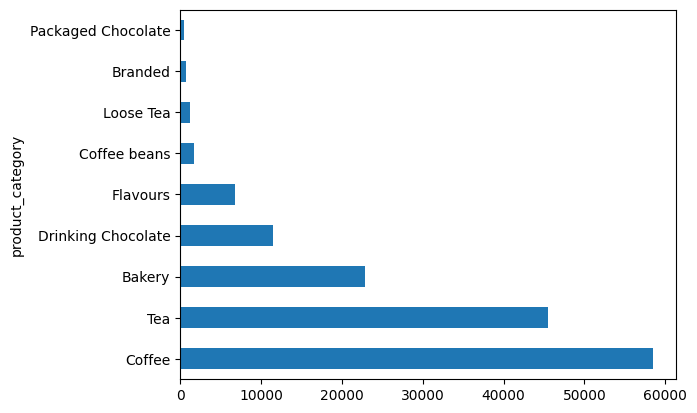

In [25]:
df["product_category"].value_counts().plot(kind="barh")


In [ ]:
df["product_category"].value_counts()
#Coffee and Tea are the most popular position, followed by Bakery and Drinking chocolate.

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

<Axes: ylabel='proportion'>

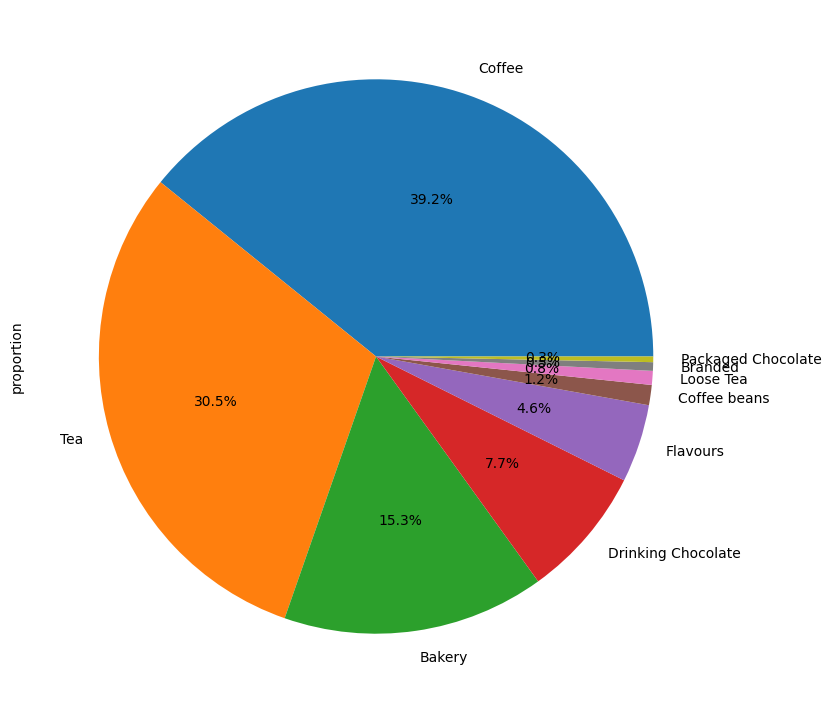

In [32]:
df["product_category"].value_counts(normalize="percentile").plot.pie(figsize=(9, 9), autopct='%1.1f%%')

In [ ]:
df.groupby(["product_category"])["product_type"].value_counts()
#There is information about all product_type types of each product categories

product_category    product_type         
Bakery              Scone                    10173
                    Pastry                    6912
                    Biscotti                  5711
Branded             Housewares                 526
                    Clothing                   221
Coffee              Gourmet brewed coffee    16912
                    Barista Espresso         16403
                    Organic brewed coffee     8489
                    Drip coffee               8477
                    Premium brewed coffee     8135
Coffee beans        Organic Beans              415
                    Gourmet Beans              366
                    Premium Beans              336
                    Espresso Beans             319
                    House blend Beans          183
                    Green beans                134
Drinking Chocolate  Hot chocolate            11468
Flavours            Regular syrup             4979
                    Sugar free syrup    

In [ ]:

df[df["product_category"] == "Bakery"]["product_detail"].value_counts()
#All products of each type of Bakery category, in this project I will make ml model for predicting 
#consumption of each bakery product separately. 

product_detail
Chocolate Croissant        3076
Ginger Scone               2324
Cranberry Scone            2077
Hazelnut Biscotti          2009
Jumbo Savory Scone         2008
Scottish Cream Scone       1952
Croissant                  1933
Almond Croissant           1903
Chocolate Chip Biscotti    1891
Oatmeal Scone              1812
Ginger Biscotti            1811
Name: count, dtype: int64

<Axes: xlabel='product_detail'>

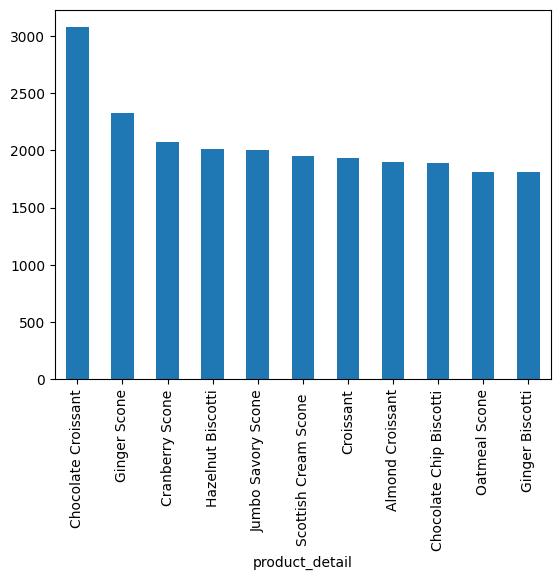

In [45]:
df[df["product_category"] == "Bakery"]["product_detail"].value_counts().plot(kind="bar")

In [ ]:
#Now i will find amount of money per each transaction_id
#Eventhough I'm not sure if it's a part of Bivariate or Univariate analysis
#because i collect data from 2 columns, I will leave this part here and create
#revenue column as i would need it in the future 
df['revenue'] = df["transaction_qty"] * df["unit_price"]
df["revenue"]

0         6.00
1         6.20
2         9.00
3         2.00
4         6.20
          ... 
149111    5.00
149112    6.00
149113    3.00
149114    3.75
149115    1.60
Name: revenue, Length: 149116, dtype: float64

# Multivariate analysis 

In [ ]:
#Before doing Multivariate analysis, I would like to separate time of transactions by months, weeks, days,
#and time of the day (before 12:00 - Morning, 12:00 - 18:00 , evening 18:00 - closing time)

In [50]:
df["month"] = df["transaction_date"].dt.month_name()


In [ ]:
df['day'] = df["transaction_date"].dt.day_of_year


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue,day
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,1
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,1
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,1
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,1
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,181
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,181
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,181
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,181


In [51]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue,day,month
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,1,January
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,1,January
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,1,January
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,1,January
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,181,June
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,181,June
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,181,June
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,181,June


In [52]:
df["day_of_week"] = df["transaction_date"].dt.day_name()


In [ ]:
df["transaction_time"] = pd.to_datetime(df['transaction_time'].astype(str))
df["transaction_time"].dtype


dtype('<M8[ns]')

In [81]:
df["time"] = df["transaction_time"].dt.hour

In [88]:
conditions = [
    (df['time'] < 12),
    (df['time'] >= 12) & (df['time'] < 18),
    (df['time'] >= 18)
]
part_of_day = ['morning', 'lunch', 'evening']

df['part_of_day'] = np.select(conditions, part_of_day, default='unknown')

df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue,day,month,day_of_week,time,part_of_day
0,1,2023-01-01,2025-07-15 07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,1,January,Sunday,7,morning
1,2,2023-01-01,2025-07-15 07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,1,January,Sunday,7,morning
2,3,2023-01-01,2025-07-15 07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,1,January,Sunday,7,morning
3,4,2023-01-01,2025-07-15 07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,1,January,Sunday,7,morning
4,5,2023-01-01,2025-07-15 07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,1,January,Sunday,7,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,2025-07-15 20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,181,June,Friday,20,evening
149112,149453,2023-06-30,2025-07-15 20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,181,June,Friday,20,evening
149113,149454,2023-06-30,2025-07-15 20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,181,June,Friday,20,evening
149114,149455,2023-06-30,2025-07-15 20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,181,June,Friday,20,evening


In [94]:
df.drop(["transaction_time", "transaction_date", "transaction_id"], axis = 1, inplace=True)


In [95]:
df

,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue,day,month,day_of_week,time,part_of_day
0,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,1,January,Sunday,7,morning
1,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,1,January,Sunday,7,morning
2,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,1,January,Sunday,7,morning
3,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,1,January,Sunday,7,morning
4,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,1,January,Sunday,7,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,181,June,Friday,20,evening
149112,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,181,June,Friday,20,evening
149113,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,181,June,Friday,20,evening
149114,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,181,June,Friday,20,evening
